In [1]:
#IMPORTING PACKAGAES######

from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
##READING IN DATA#####
#Reformatting data into a timeseries via converting string values to datetime values ####
#indexing that dataset with the time column#####

path = pd.read_csv(r"C:\Users\Vinnie\OneDrive\Desktop\ARBSAMPLEFULL.csv")
path['Time'] = pd.to_datetime(path['Time'],infer_datetime_format=True)
indexedDataset = path.set_index(['Time'])
indexedDataset.head(5)

,ArbNm,Spd,SymOnePrice,SymTwoPrice,SymOnePL,SymTwoPL,TotalPL,Unnamed: 8,Unnamed: 9,Tval,Unnamed: 11,Unnamed: 12,ZC,Zscore,Corr,Unnamed: 16,ADF
Time,,,,,,,,,,,,,,,,,
2022-06-26 12:19:56,3330,0.021346,6.0800,0.295400,-0.02400,-0.011733,-0.035734,1,0.02,-3.69,-3.35,20.51,47,1.65070,92.9165,-1,-2.17612
2022-06-26 12:19:37,3330,0.017244,6.0800,0.295600,-0.02400,-0.011733,-0.035734,1,0.02,-3.69,-3.35,20.51,47,1.65070,92.9165,-1,-2.17612
2022-06-26 12:16:53,3329,0.019295,6.0800,0.295500,0.00000,-0.054951,-0.054951,1,0.02,-3.69,-3.35,20.51,47,1.65070,92.9165,-1,-2.17612
2022-06-26 12:16:34,3329,0.015193,6.0800,0.295700,-0.02400,-0.059851,-0.083851,1,0.02,-3.69,-3.35,20.51,47,1.65070,92.9165,-1,-2.17612
2022-06-26 12:08:29,3327,-0.002170,0.4295,0.002379,0.00676,0.014754,0.021514,1,0.00,-5.41,-3.35,181.45,52,-1.62204,95.3530,1,-1.62625


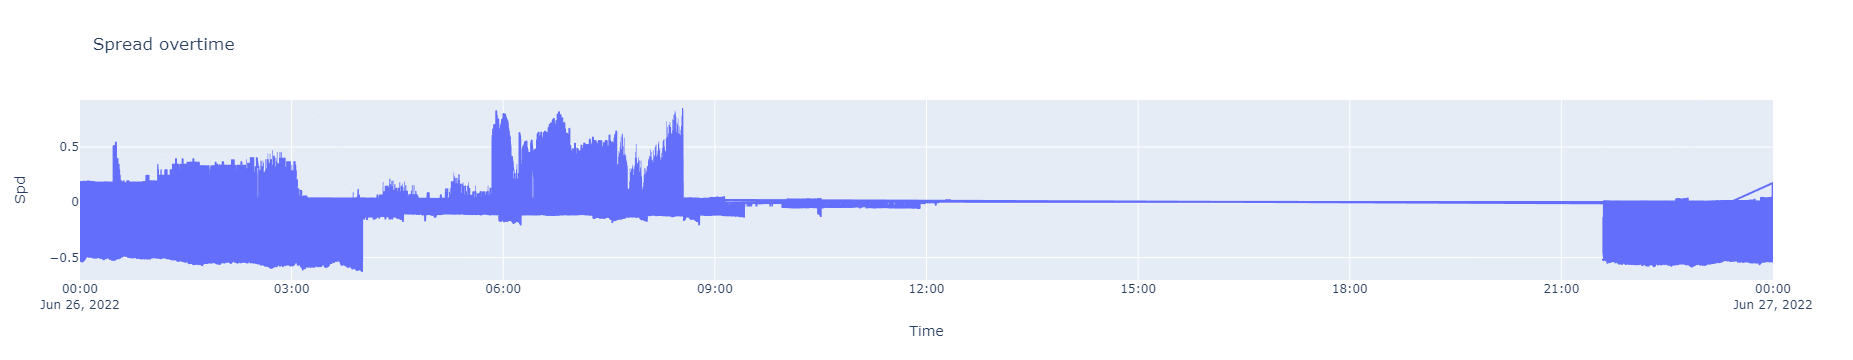

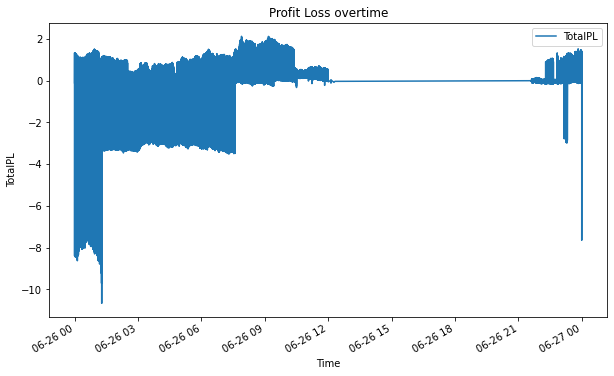

In [33]:
#PLOTTING Profit and Loss or targeted variable for visual refernce of distribution in a timeseries and setting pixelation dimensionality to 12 length units by 6 width units#####
Plot = path.plot.line(x='Time', y='TotalPL')
Plot.set_title("Profit Loss overtime")
Plot.set_xlabel("Time")
Plot.set_ylabel("TotalPL")
(figsize:=(12,6))
fig = px.line(path, x="Time", y="Spd",
                title="Spread overtime")
(figsize:=(12,6))
fig.show()

In [5]:
###Using numpy functions to calculate rolling mean and rolling standard deviation with a window of 21 hours then print#####
rolmean = indexedDataset.rolling(window=21).mean()
rolstd = indexedDataset.rolling(window=21).std()
print(rolmean,rolstd)

                           ArbNm       Spd  SymOnePrice  SymTwoPrice  \
Time                                                                   
2022-06-26 12:19:56          NaN       NaN          NaN          NaN   
2022-06-26 12:19:37          NaN       NaN          NaN          NaN   
2022-06-26 12:16:53          NaN       NaN          NaN          NaN   
2022-06-26 12:16:34          NaN       NaN          NaN          NaN   
2022-06-26 12:08:29          NaN       NaN          NaN          NaN   
...                          ...       ...          ...          ...   
2022-06-26 00:00:55  3236.428571  0.088472     0.320188     0.164812   
2022-06-26 00:00:33  3236.571429  0.097065     0.340038     0.152060   
2022-06-26 00:00:31  3236.428571  0.088343     0.320131     0.164821   
2022-06-26 00:00:05  3236.571429  0.096981     0.340129     0.152076   
2022-06-26 00:00:03  3236.428571  0.088181     0.320217     0.164852   

                     SymOnePL  SymTwoPL   TotalPL  Unnamed: 8  

In [6]:
##First ADF statistical code format####

def ad_test(path):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adfuller(path['Spd'])

(-3.8180273443572563,
 0.0027281643770847375,
 45,
 19017,
 {'1%': -3.4306939124416864,
  '5%': -2.861691996779388,
  '10%': -2.566850903807643},
 -48034.4505577668)

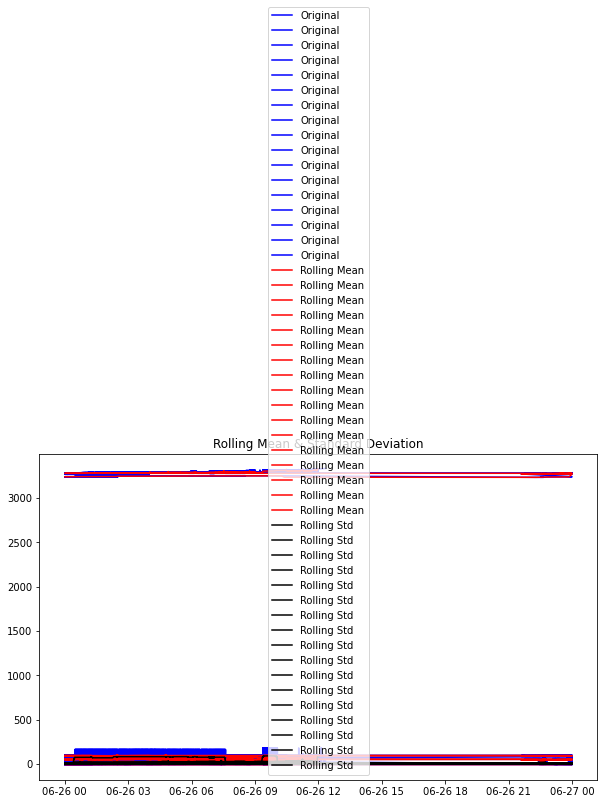

In [7]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
###Second Augmented Dickie format to check validity of first result####
##TEST STATISTIC IS EQUIVALENT TO FIRST TEST###
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Spd'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -3.818027
p-value                            0.002728
#Lags Used                        45.000000
Number of Observations Used    19017.000000
Critical Value (1%)               -3.430694
Critical Value (5%)               -2.861692
Critical Value (10%)              -2.566851
dtype: float64


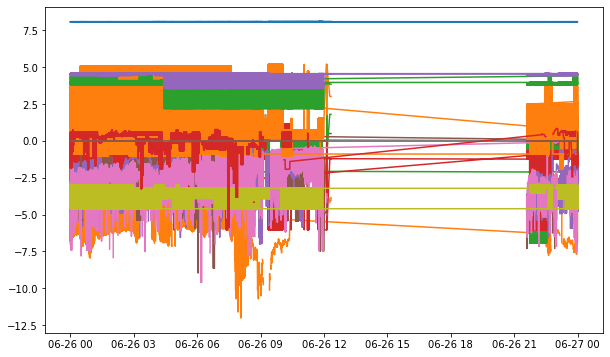

In [9]:
###LOGARITHMICALLY SCALING THE DATASET TO CHECK FOR STATIONARITY#####

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

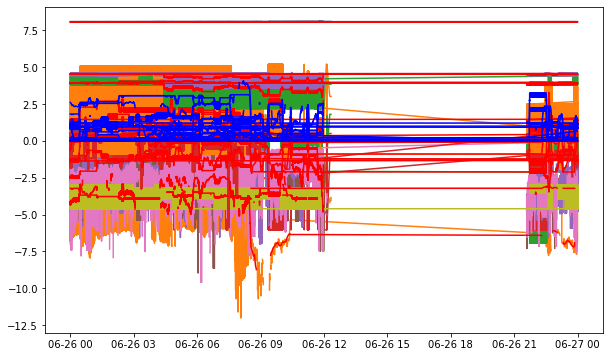

In [25]:
####DEVELOPING A STATIONARITY SERIES IN LOGARITHMIC FORM###

movingAverage = indexedDataset_logScale.rolling(window=21).mean()
movingSTD = indexedDataset_logScale.rolling(window=21).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='blue')

In [11]:
###STEPWISE FITTING THE ARIMA MODEL FOR SPREAD###

from pmdarima import auto_arima
stepwise_fit = auto_arima(path['Spd'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21979.567, Time=14.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1504.654, Time=1.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7390.261, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17596.803, Time=5.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1506.654, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17788.669, Time=15.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-19150.477, Time=9.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-19981.184, Time=15.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-19772.897, Time=22.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18309.455, Time=7.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-20102.187, Time=12.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-19805.840, Time=10.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-20176.529, Time=20.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-23030.402, Time=5.72 sec
 

In [12]:
##DEFINING THE TRAIN AND TEST FEATURES OF ARIMA TO 21 HOURS WINDOW DURATION
print(path.shape)
train=path.iloc[:-21]
test=path.iloc[-21:]
print(train.shape,test.shape)

(19063, 18)
(19042, 18) (21, 18)


In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Spd'], order = (1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Spd   No. Observations:                19042
Model:                 ARIMA(1, 0, 5)   Log Likelihood               11516.540
Date:                Sun, 26 Jun 2022   AIC                         -23017.081
Time:                        12:06:06   BIC                         -22954.246
Sample:                             0   HQIC                        -22996.474
                              - 19042                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0389      0.010     -3.753      0.000      -0.059      -0.019
ar.L1          0.9948      0.000   2751.297      0.000       0.994       0.995
ma.L1         -1.4895      0.006   -234.408      0.000      -1.502      -1.477
ma.L2          0.1094      0.013      8.245      0.000       0.083       0.135
ma.L3          0.4106      0.010     41.877      0.000       0.391       0.430
ma.L4          0.2335      0.011     20.770      0.000       0.211       0.256
ma.L5         -0.2170      0.006    -33.586      0.000      -0.230      -0.204
sigma2         0.0173      0.000    129.203      0.000       0.017       0.018
===================================================================================
Ljung-Box (L1) (Q):                  20.31   Jarque-Bera (JB):             13206.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              15.48   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

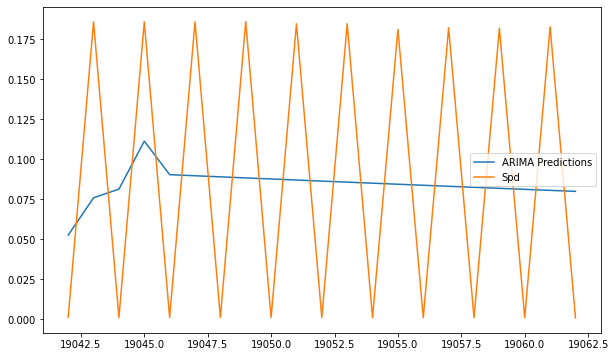

In [14]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Spd'].plot(legend=True)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Spd'].mean()
rmse=sqrt(mean_squared_error(pred,test['Spd']))
print(rmse)

0.08938033717256655
